# Bimodal experiments

<h1>Bimodal Experiments</h1>

<p>
<b>SWEDNESS/LINXS Doctoral-level course on neutron imaging</b>
<br />
</p>
<br />
<p style="font-size:1em;">May 17-20, 2021</p>
<br /><br />
<p style="font-size:1.5em;padding-bottom: 0.25em;">Anders Kaestner</p>  
<p style="font-size:1em;">Laboratory for Neutron Scattering and Imaging<br />Paul Scherrer Institut</p>

In [1]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import numpy as np
import skimage.io as io
from scipy import linalg
import matplotlib as mpl
from sklearn import mixture
import pandas as pd

# plt.rcParams["figure.figsize"] = (8, 8)
# plt.rcParams["figure.dpi"] = 100
# plt.rcParams["font.size"] = 14
# plt.rcParams['font.family'] = ['sans-serif']
# plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
# plt.style.use('default')
# sns.set_style("whitegrid", {'axes.grid': False})

## Literature / Useful References

### Books
#### General:
- John C. Russ, "The Image Processing Handbook",(Boca Raton, CRC Press)
 - Available [online](http://dx.doi.org/10.1201/9780203881095) within domain ethz.ch (or proxy.ethz.ch / public VPN) 
 
#### Fusion specific:
- Mitchell, H.B., ["Data Fusion: Concepts and Ideas"](https://www.doi.org/10.1007/978-3-642-27222-6), Springer Verlag, 2012.
- Mitchel, H.B., ["Image Fusion - Theories, Techniques and Applications"](https://www.doi.org/10.1007/978-3-642-11216-4), Springer Verlag, 2010.
- T. Stathaki, ["Image fusion"](https://doi.org/10.1016/B978-0-12-372529-5.X0001-7), Academic Press, 2008
- Goshtasby, A. Ardeshir, ["Image Registration Principles, Tools and Methods"](10.1007/978-1-4471-2458-0), Springer Verlag, 2012


- *Xiao, G., Bavirisetti, D.P., Liu, G., Zhang, X., ["Image Fusion"](https://www.doi.org/10.1007/978-981-15-4867-3), Springer Verlag, to be published July, 2020*
    

## Outline

- Motivation (Why and How?)
- Scientific Goals
- Image fusion
- Bivariate segmentation

# Imaging modalities
## Some imaging experiments and their challenges

<table>
<col width="400px" />
<tr><th>Hydrology in soil and geology</th><th>Cultural heritage</th></tr>
<tr>
<td>
<center>
<img src="figures/soil.png" style="height:200px" />
</center>        
    
- Segmentation accuracy
- Estimate water content

</td>
<td>
<center>
<img src="figures/buddha_neutron.png" style="height:200px" />
</center>
    
- Segmentation accuracy
- Material classification
        
</td>  
</tr>
<tr><th>Building materials</th><th>Materials science</th></tr>
<tr>
<td>
<center>    
<img src="figures/CapillaryRise.png" style="height:200px" />
</center>        
    
- Estimate water content
- Dimensional changes

</td>
<td>
<center>    
<img src="figures/weld.png" style="height:200px" />
</center>
    
- Penetration power
- Ambiguous readings
        
</td>  
</tr>
</table>


```{figure} figures/soil.png
---
scale: 50%
---
In the soil the graylevels are often ambiguous.
```

```{figure} figures/buddha_neutron.png
---
scale: 50%
---
Studies of the cultural heritage.
```

```{figure} figures/CapillaryRise.png
---
scale: 50%
---
Dimensional changes in porous media.
```

```{figure} figures/weld.png
---
scale: 50%
---
Material science with material mixes.
```

## Reasons to select an imaging modality?
Reasons to select or reject a specific imaging method
<table>
    <cols width="600px">
<tr>
<th>
    <center>
    <img src="figures/noun_advantage.svg" style="height:100px">
            </center>
</th>    
<th>
         <center><img src="figures/noun_Disadvantage.svg" style="height:100px"></center>
</th></tr>
<tr><td>
    
- Good transmission
- Good contrast
- Relevant features visible
- Materials can be identified
    
</td><td>
    
- Low transmission
- Low contrast
- Not all features visible
- Ambiguous response
    
</td></tr>
</table>

    
Until now, we only collected image features from a single modality.

## The aim of multimodal imaging
### Purpose of multi-modality
Match the advantages of each method against the disadvantages of the other methods to obtain more information than using each method individually.

1. Extend range of operation.
2. Extend spatial and temporal coverage.
3. Reduce uncertainty.
4. Increase reliability.
5. Robust system performance.

<img src="figures/multispectral_goggles.png" style="height:200px" />

```{figure} figures/multispectral_goggles.png
---
---
The multispectral glasses from the movie 'National Treasure'.
```

## The players of an imaging experiment

<img src="figures/imaging_balls.png" style="height:500px" />

```{figure} figures/imaging_balls.png
---
scale: 30%
---
An imaging experiment is only successful when all aspects are considered.
```

## Some considered modalities -  Neutrons and X-rays

In material science it often relevant to combine imagning with neutrons and X-rays. The reason is the complementarity between the two modalities. Simply put, neutrons are often sensitive to low-z materials while x-rays are more sensitive to high-z materials. Combining the two modalities is of particular interest when the sample is a mix of high and low-z materials.
```{figure} figures/camera_neutrons.png
---
scale: 20%
---
Neutron radiography of a camera.
```
```{figure} figures/periodicN.png
---
scale: 70%
---
Attenuation coefficients for thermal neutrons.
```
```{figure} figures/camera_xrays.png
---
scale: 10%
---
X-ray radiography of a camera.
```
```{figure} figures/periodicX.png
---
scale: 70%
---
Attenuation coefficients for 125keV X-rays.
```

<table>
<cols width="700px" />
<tr><th>Neutrons</th><th>X-rays</th></tr>
<tr>
<td>
<center>
<img src="figures/camera_neutrons.png" style="height:200px" />
</center>        
<center>
<img src="figures/periodicN.png" style="height:400px" />
</center>     
</td>
<td>
<center>
<img src="figures/camera_xrays.png" style="height:200px" />
</center>
    <center>
<img src="figures/periodicX.png" style="height:400px" />
</center>
</td>
</tr>
</table>

## Some considered modalities for medical imaging

Imaging is widely used in medical applications. There are also many different imaging modalities available, each revealing it own particular information.

The modalities also differ in the resolution that can be achived. Therefore, it makes sense to combine the modalities to increase the understanding of provided information.

```{figure} figures/MedicalFusion.jpg
---
scale: 80%
---
Combining different medical imaging modalities.
```

<img src="figures/MedicalFusion.jpg"/>

[Du et al. 2015](https://doi.org/10.1016/j.neucom.2015.07.160)

## Some considered modalities - Grating interferometry

Grating interferometry is an imaging technique that exploits the wave property of the beam. This makes it possible to extract more information than the traditional transmission image. These are
- The phase contrast - measures the phase shift of the beam to provide better contrast than the tranmission in some cases.
- The dark field contrast - is related to the scattered bream and can probe clusters of sample features that a much smaller than the resolution of the imaging system.

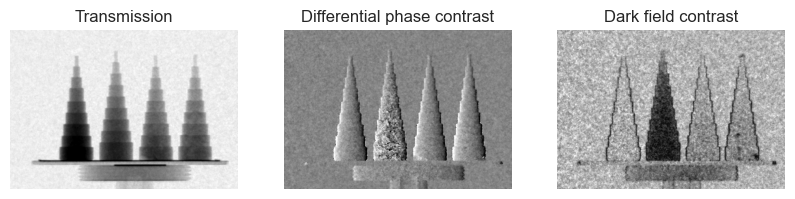

In [2]:
fig,ax=plt.subplots(1,3,figsize=(10,5))
ax[0].imshow(io.imread("figures/nGI_TI.png"));  ax[0].set_title('Transmission');                ax[0].axis('off')
ax[1].imshow(io.imread("figures/nGI_DPC.png")); ax[1].set_title('Differential phase contrast'); ax[1].axis('off')
ax[2].imshow(io.imread("figures/nGI_DFI.png")); ax[2].set_title('Dark field contrast');         ax[2].axis('off');


- Data comparable on pixel level
- Non-linear relation between the variables.
- Improved estimation schemes using iterative process
- Physical interpretation/motivation to fuse?

## Some considered modalities - Spectroscopic imaging
<img src="figures/ES_Fe.png" style="height:400px" />

```{figure} figures/ES_Fe.png
---
scale: 80%
---
Neutron energy scan through a piece of iron.
```

- Material analysis
- Selector calibration

S. Peetermans

## Other modalities and dimensionality

__The information can also be provided as few localized points__
- Single point measurements
- Surface information
- Single radiographs vs CT data

__to provide__
- Temperature
- Flowrate
- Pressure


# Data and image fusion

## Definition
The theory, techniques and tools which are used for 
- combining sensor data, or data derived from sensory data, 
- into a common representational format.
	
## Aim
To improve the quality of the information, so that it is, in some sense, better than would be possible if the data sources were used individually.


[Mitchell 2012](https://www.doi.org/10.1007/978-3-642-27222-6)

    
## Fusion approaches - no golden recipe
### Fusion strategies

- __Multivariate fusion:__ All data are combined using the same concept.
- __Augmented fusion:__ Modalities have different functions in the fusion process.
- __Artifact reduction by fusion:__ The second modality can be used to fill in the blanks.
- __Combination:__ A single fusion method may not give the final result - combination 

### Select strategy
The fusion strategy determined by:

- Sample composition 
- Experiment objectives 
- Condition of the data


## Levels of fusion

|Input|Output|Description|
|:---:|:----:|:---|
|Data|Data|Input data is smoothed/filtered/segmented|
|Data|Feature|The pixels are reduced to features using multiple sources.|
|Feature|Feature|Input features are reduced in number, <br /> or new features are generated by fusing input features.|
|Feature|Decision|Input features are fused together to give output decision.|
|Decision|Decision|Multiple input decisions are fused together <br/>to give a final output decision. e.g. Random forest|


# Image fusion workflow

Image fusion is the process to combine images from different modalities with the aim to enhance the information compared the images individually. This process has serveral steps and the fusion can be done on several levels of abstraction.

```{figure} figures/imagefusion_process.pdf
---
scale: 100%
---
Flow chart showing how image fusion can be done
```

<img src="figures/imagefusion_process.svg" style="height:800px" />

[Mitchel, 2010](https://www.doi.org/10.1007/978-3-642-11216-4), 
[Goshtasby, 2012](https://www.doi.org/10.1007/978-1-4471-2458-0)

## Catastrophic fusion
### Definition
The combination perform worse than the individual modalities.


Catastrofic fusion can be caused by:
- Selection of the wrong variables.
- Too complex combination.
- Sensor information canceling each other.

<img src="figures/bad_soup.png" style="height:300px" />

```{figure} figures/bad_soup.png
---
scale: 50%
---
More chefs don't always mean better soup, the same applies to data fusion. Chose your source combination and fusion metods carefully.
```

## Image registration
From last weeks lecture: A series of affine transformations to bring images on the same grid.

### The process

<img src="figures/registration.svg" style="height:600px" />


```{figure} figures/registration.pdf
---
scale: 100%
---
Registration optimizes the scale, rotation, and position of an image compared to a fixed reference. 
```

## Registration considerations
Registration is an optimization problem with many local minima.

### Manual or guided registration
- Perform the full transformation manually
- Identify land marks, points, lines, planes
- Provide a coarse preregistration

### Automatic registration 
- Iterative process 
- Metrics
- Multi-modality loose common landmarks 

[Goshtasby, 2012](https://www.doi.org/10.1007/978-1-4471-2458-0)

# Qualitative fusion: Registration and covisualization
Use e.g. VG Studio or 3DSlicer to 

- Register data sets
- Interactive guided segmentation of the separate data sets.

```{figure} figures/swordN.png
---
scale: 100%
---
The sword from lake Zug as seen with neutrons.
```

```{figure} figures/swordX.png
---
scale: 100%
---
The sword from lake Zug as seen with X-rays.
```

<table>
<cols width="700px" />
<tr><th>Neutrons</th><th>X-rays</th></tr>
<tr>
<td>
<center>
<img src="figures/swordN.png" style="height:400px" />
</center>            
</td>
<td>
<center>
<img src="figures/swordX.png" style="height:400px" />
</center>
</td>
</tr>
</table>


mannes2015_NXCultHer

## Let's load some test data

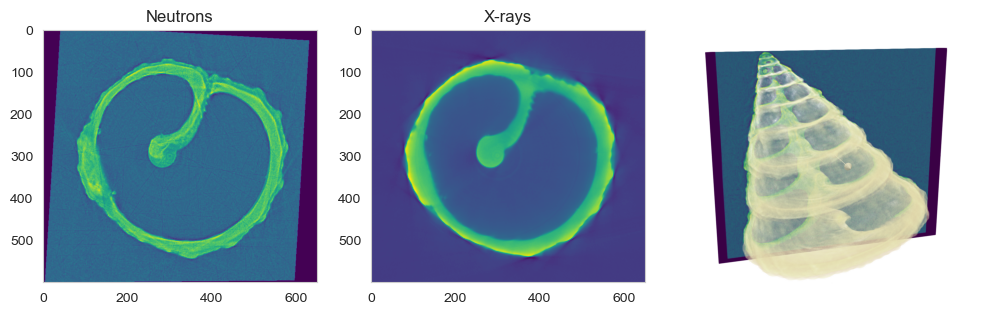

In [3]:
imgA=np.load('data/shellN.npy')
imgB=np.load('data/shellX.npy')
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,5))
ax1.imshow(imgA,cmap='viridis'), ax1.set_title('Neutrons')
ax2.imshow(imgB,cmap='viridis'), ax2.set_title('X-rays');
ax3.imshow(plt.imread('figures/snailshellNeutron.png')); ax3.axis('off');

## Visualization techniques - Checker board


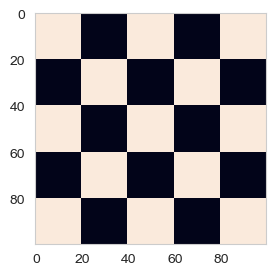

In [4]:
def checkerBoard(imgA,imgB,tiles=10) :
    if imgA.shape != imgB.shape :
        raise Exception('Image have different sizes')
    
    dims     = imgA.shape
    tileSize = (dims[0]//tiles,dims[1]//tiles)
    
    mix = np.zeros(dims)
    
    for r in np.arange(0,tiles) :
        for c in np.arange(0,tiles) : 
            if (c+r) % 2 : 
                mix[(r*tileSize[0]):((r+1)*tileSize[0]),(c*tileSize[1]):((c+1)*tileSize[1])]= imgB[(r*tileSize[0]):((r+1)*tileSize[0]),(c*tileSize[1]):((c+1)*tileSize[1])]
            else : 
                mix[(r*tileSize[0]):((r+1)*tileSize[0]),(c*tileSize[1]):((c+1)*tileSize[1])]= imgA[(r*tileSize[0]):((r+1)*tileSize[0]),(c*tileSize[1]):((c+1)*tileSize[1])]

    return mix
plt.figure(figsize=(3,3))
plt.imshow(checkerBoard(np.ones((100,100)),np.zeros((100,100)),tiles=5),interpolation='none');

### Try checker board with images

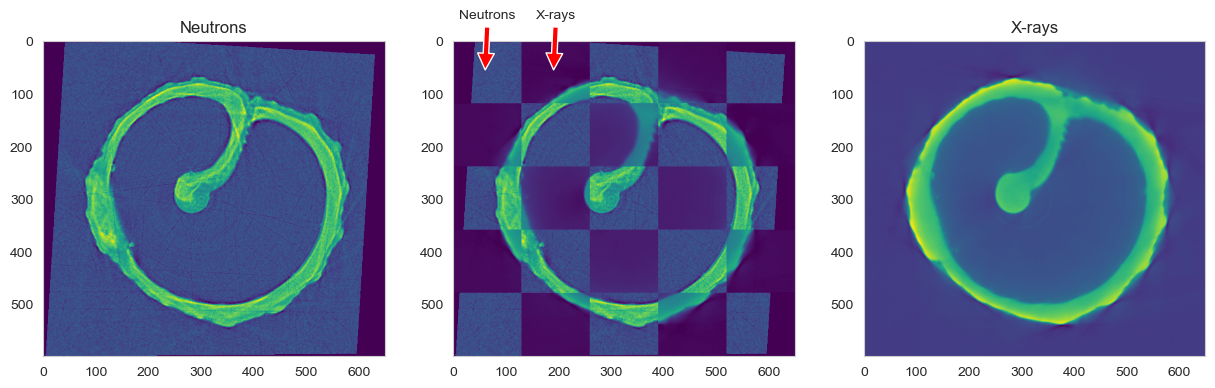

In [5]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))
ax1.imshow(imgA,cmap='viridis',vmin=10000,vmax=60000), ax1.set_title('Neutrons')
ax2.imshow(checkerBoard(imgA,imgB,tiles=5),cmap='viridis',vmin=10000,vmax=60000); 
ax2.annotate('Neutrons',
            xy=(60, 60), xycoords='data',
            xytext=(0.1, 1.1), textcoords='axes fraction',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')
ax2.annotate('X-rays',
            xy=(190, 60), xycoords='data',
            xytext=(0.3, 1.1), textcoords='axes fraction',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')
ax3.imshow(imgB,cmap='viridis'), ax3.set_title('X-rays');

## Visualization techniques - Color chanel mixing
With two or more modalities, we can visualize the mix using the RGB color channels:

$$\begin{cases}
R & modality_A\\
G & modality_B\\
B & \frac{modality_A+modality_B}{2}
\end{cases}$$
some intensity scaling may be needed for best result.

In [6]:
def channelMix(imgA,imgB, order=(0,1,2)) :
    imgAN=(imgA-imgA.min())/(imgA.max()-imgA.min())
    imgBN=(imgB-imgB.min())/(imgB.max()-imgB.min())
    
    rgb=np.zeros((imgA.shape[0],imgA.shape[1],3));
    rgb[:,:,order[0]]=imgAN
    rgb[:,:,order[1]]=imgBN
    rgb[:,:,order[2]]=0.5*(imgAN+imgBN)
    
    return rgb

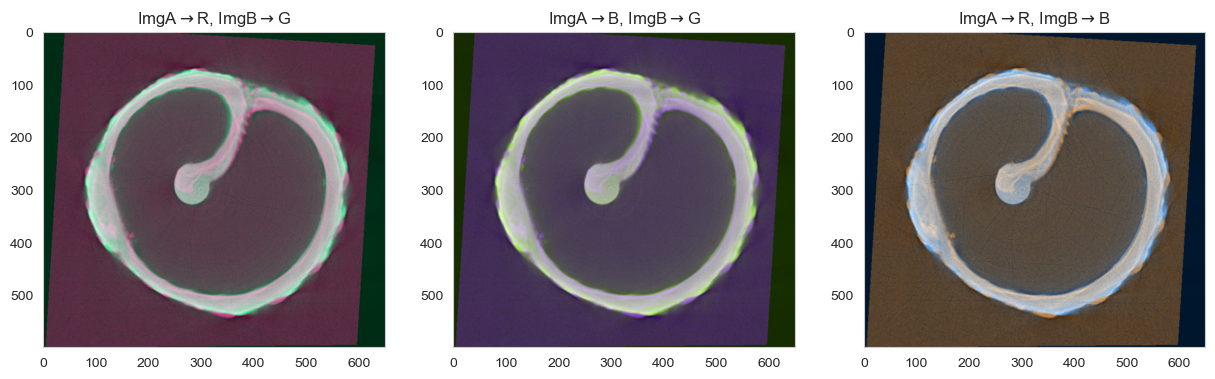

In [7]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,6))
ax1.imshow(channelMix(imgA,imgB,order=(0,1,2))), ax1.set_title(r'ImgA$\rightarrow$R, ImgB$\rightarrow$G');
ax2.imshow(channelMix(imgA,imgB,order=(2,1,0))), ax2.set_title(r'ImgA$\rightarrow$B, ImgB$\rightarrow$G');
ax3.imshow(channelMix(imgA,imgB,order=(0,2,1))), ax3.set_title(r'ImgA$\rightarrow$R, ImgB$\rightarrow$B');

# Bimodal segmentation

## Histogram of single modality

When you do experiments with a single modiality, you only obtain a single histogram. The modes of the histogram may merge into a single mode if the SNR is too low to separate the feature classes. This leads to a large amount of miss-classifications. The blue region between the histogram peaks in {numref}`Figure {number} <fig_singlehistA>` represents the area of ambiguous decisions. 

```{figure} figures/overlapping_classesA.png
---
scale: 30%
name: fig_singlehistA
---
Histogram of two classes using modality _A_.
```

<img src="figures/overlapping_classesA.png" style="height:500px">

## Individual histograms of two modalities

Now we may conclude that the first modality we looked at doesn't provide sufficient information to make a reliable segmentation. Therefore, we go to a second modality. Unfortunately, this modality has the same low class separability as you can see in {numref}`Figure {number} <fig_singlehistB>`. This time the two classes have different responses and the histogram modes have swapped compared to {numref}`Figure {number} <fig_singlehistA>`. 
```{figure} figures/overlapping_classesB.png
---
scale: 30%
name: fig_singlehistB
---
Histogram of two classes using modality _B_.
```
So the conclusion is that we don't get much closer to our segmented image using these modalities individually.

<table>
<cols width="700px" />
<tr><th>Modality A</th><th>Modality B</th></tr>
<tr>
<td>
<center>
<img src="figures/overlapping_classesA.png" style="height:500px" />
</center>            
</td>
<td>
<center>
<img src="figures/overlapping_classesB.png" style="height:500px" />
</center>
</td>
</tr>
</table>

## Bivariate histogram

Now, if we start combining the two modalities, we start seeing the benefit of using more than one modality. The bivariate histogram, which we already have looked at in previous lectures is a great way to visualize how two variables depend on each other. 

```{figure} figures/bivariate_classes.png
---
scale: 40%
name: fig_bivariatehist
---
A bivariate histogram of modalities _A_ and _B_.
```

In the histogram show in {numref}`Figure {number} <fig_bivariatehist>`, we see that there is a clear separation between class _A_ and _B_ that could be easily thresholded.

<img src="figures/bivariate_classes.png" style="height:600px" />

### Example: Roots in soil

```{figure} figures/root_slices.pdf
---
scale: 80%
name: fig_rootimages
---
Tomography slices of a soil sample with roots.
```

<img src="figures/root_slices.svg" style="height:500px"/>

### Bivariate histogram of roots

```{figure} figures/root_histogram.png
---
scale: 80%
name: fig_rootimageshist
---
Bivariate histogram of the root images in {numref}`Figure {number} <fig_rootimages>`
```

<img src="figures/root_histogram.png" style="height:700px" />

## Segmentation methods
### Data
- Images from $M$ modalities $f_1, \ldots, f_M$
- Registered
- Artifact corrected

### Classes
The $N$ classes are described by: 
$$\begin{cases}
\mathcal{H}_1 : p(\mathbf{\mu}_1,\Sigma_1)\nonumber\\
\mathcal{H}_2 : p(\mathbf{\mu}_2,\Sigma_2)\nonumber\\
\vdots\nonumber\\
\mathcal{H}_N : p(\mathbf{\mu}_N,\Sigma_N)\nonumber
\end{cases}
$$


[Duda, Hart, and Stork, 2001](https://www.wiley.com/en-us/Pattern+Classification%2C+2nd+Edition-p-9781118586006)

## Previous segmentation methods

In this class we have already looked into many different ways to perform the segmentation on images. These are methods that are well suited for segmenting bi- or multivariate data:

- k-means
- k-NN
- Regression
- Neural networks

## Gaussian mixture model

With Gaussian distribution we can describe the bivariate histogram using:
$$p(\theta)=\sum_{1}^{N} \phi_i\,\mathcal{N}(\mathbf{\mu}_i,\Sigma_i) $$

- $\mu{}_i$ - vector with averages for each class.
- $\Sigma{}_i$ - covariance matrix for each class.
- $\phi{}_i$ - mixing coefficient.

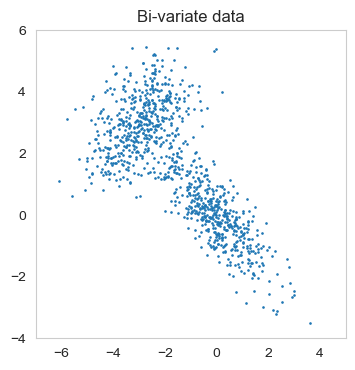

In [8]:
# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C1 = np.array([[1, -0.5], [-0.5, 1]])
C2 = np.array([[1, 0.25], [0.25, 1]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C1), np.dot(np.random.randn(n_samples, 2),C2) + np.array([-3, 3])]

plt.figure(figsize=[4,4])
plt.scatter(X[:,0],X[:,1],0.8)
plt.xlim(-7., 5.),plt.ylim(-4., 6.)
plt.title('Bi-variate data');

In [9]:
def plot_results(X, Y_, means, covariances, title, ax, showShape=True, showCenter=False):
    color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])
    
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        ax.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        if showShape :
            angle = np.arctan(u[1] / u[0])
            angle = 180. * angle / np.pi  # convert to degrees
            ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
            ell.set_clip_box(ax.bbox)
            ell.set_alpha(0.5)
            ax.add_artist(ell)
            
        if showCenter :
            ax.plot(mean[0],mean[1],'ro')

    ax.set_xlim(-7., 5.)
    ax.set_ylim(-4., 6.)
    ax.set_title(title)


### Gaussian mixture model fitting

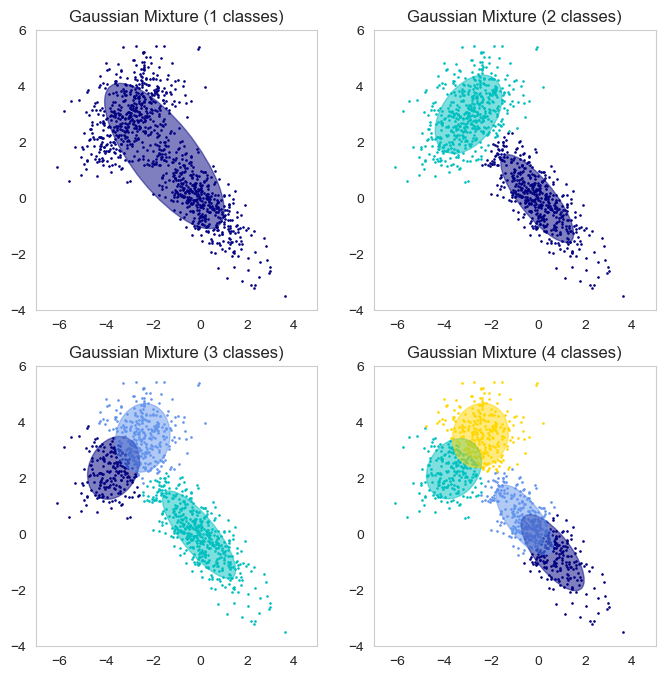

In [10]:
fig, axes = plt.subplots(2,2,figsize=(8,8))
# Fit a Gaussian mixture with EM using five components
for i,ax in zip(np.arange(0,len(axes.ravel())),axes.ravel()) :
    gmm = mixture.GaussianMixture(n_components=i+1, covariance_type='full').fit(X)

    plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_,
             title='Gaussian Mixture ({} classes)'.format(i+1), ax=ax)


## Classification distances 
For a set of multivariate normal distributions $p_i=\mathcal{N}(\mu_i,\Sigma_i)$

We can find the nearest neighbor class using the following distances
### Euclidean
Distance between two points
$$D_{E}=\sqrt{(x-\mu_1)^T \cdot (x-\mu_1)} $$

### Mahanalubis
Distance from class $i$ to point $x$
$$D_M=\sqrt{\left(x-\mu_i\right)^T \Sigma_i \left(x-\mu_i\right)}$$

### Bhattacharia
Distance between two classes 
$$D_B=\frac{1}{8}\left(\mu_1-\mu_2\right)^T \Sigma \left(\mu_1-\mu_2\right) + \frac{1}{2}\ln\left(\frac{|\Sigma|}{\sqrt{|\Sigma_1|\cdot|\Sigma_2|}}\right)\qquad \Sigma=\frac{\Sigma_1+\Sigma_2}{2}$$


Assign the point to the class with shortest distance.


## Graphical presentation of different distances

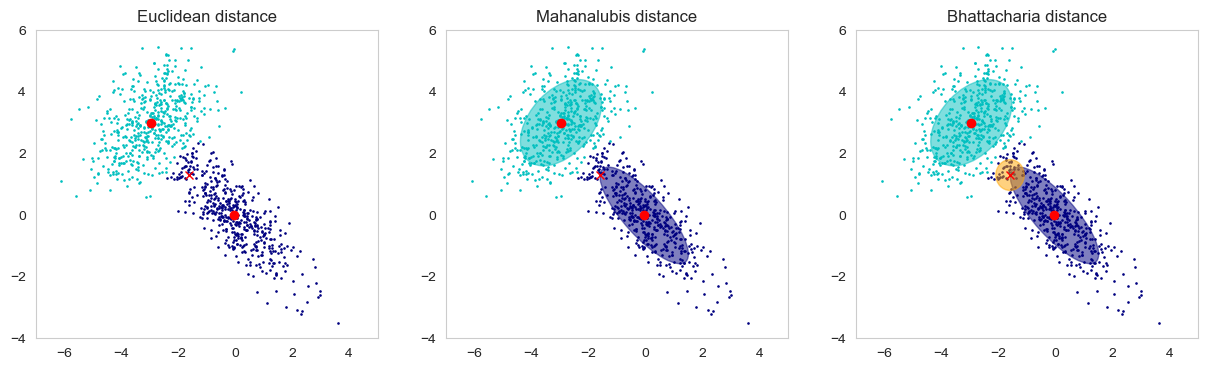

In [11]:
gmm = mixture.GaussianMixture(n_components=2, covariance_type='full').fit(X)
m=[-1.6,1.3]
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,4))

plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_,
             'Euclidean distance',ax1, showShape=False,showCenter=True)
ax1.plot(-1.6,1.3,'rx')
plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_,
             'Mahanalubis distance'.format(2),ax2, showCenter=True)
ax2.plot(-1.6,1.3,'rx')

plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_,
             'Bhattacharia distance'.format(2),ax3, showCenter=True)
v=1
ell = mpl.patches.Ellipse(m, v, v, 0, color='orange')
ell.set_clip_box(ax3.bbox)
ell.set_alpha(0.5)
ax3.add_artist(ell)
ax3.plot(m[0],m[1],'rx');

## Segmentation by Euclidean distance

```{figure} figures/roots_segmentation.pdf
---
scale: 80%
---
Segmenting the root image in 
```

<img src="figures/roots_segmentation.svg" style="height:300px" />

kaestner2016_itmnrnx

# Bivariate estimation: Working with attenuation coefficients

## Beer-Lamberts law

$$ I=I_0\,e^{-\frac{\rho}{A}\,N_A\,\sigma\,x} $$
- $\rho$ Material denstity
- $A$ Atomic weight
- $\sigma$ microscopic cross section
     - Probability of interaction
     - modality dependent

- $x$ propagation length

## Equation system

$$\begin{split}\sum{}_{i=1}^{N}\Sigma{}_{i}\,x_{i}&=q_{N}\nonumber\\\sum{}_{i=1}^{N}\mu{}_{i}\,x_{i}&=q_{X}\end{split}$$
- attn coeff known $\rightarrow$ estimate lengths.
- More pixels $\rightarrow$ more materials.



# Beyond multi modal experiments
Many bimodal experiments are done separately.

There many reasons for this, two are:

- Limited resources
- Scanners at different locations

This is often the case in medical imaging where the hospitals have different dedicated machines for each modality. It is also not always that the patient is scan using all relevant modalities at the same time, but different modalities are used at different stages of the therapy.

This is also a common approach in materials science and ex situ imaging. The home laboratory may own their own X-ray CT scanner but they need to got to a large scale facility to obtain more information with further modalities.

Next steps:
- Dynamic experiments

Last week we looked into the topic of dynamic experiments. The use of bimodal imaging is also very relevant in dynamic experiments. The observed samples and processes often change shape when you introduce a liquid, apply a preasure, etc. These shape changes are often more visible in one modality than the other. Ideally, you will have a system where one modality is sensitive to dimensional changes while the other is sensity the changes in mixing ratios and other process related parameters. 

- Combined setups
<img src="figures/NX-OnTheFlySetup.svg" style="height:400px" />

Combined setups all simultaneous acquisition using two modalities. This has the advantage that you can perform dynamic
experiments. 

{numref}`Figure {number} <fig_bivariatehist>` show a setup for bimodal neutron and X-ray imaging. The system has two difference beam geometries neutrons uses parallel beam and X-rays a cone beam. The beams are also at oblique angles and mostly also resulting in different resolutions, there it is a first requirement that the resulting iamges are registered before any analysis can be performed. 

```{figure} figures/NX-OnTheFlySetup.pdf
---
---
The outline of a bimodal imaging system for neutrons and X-rays. 
```

# Summary

## Multiple modalities
- Add more information to improve the conclusions
- Add component in the analysis and visualization
- Data fusion can be done on different levels of abstraction.
